# Lab 7
# Kevin Liang - kgl392
# Matthew Tan - mmt2338

In [127]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sympy
import scipy
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
import collections
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import collections
from collections import OrderedDict
import xgboost as xgb
from mlxtend.regressor import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestRegressor
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import statsmodels.api as sm
from scipy.stats.mstats import zscore
from sklearn.feature_selection import mutual_info_classif

In [128]:
path = "D:\Kevin Liang/Documents/1_UT_SENIOR/UT_AUSTIN_FALL_2017/EE_379K/"

Question 1 - Part 1

I used dataframe method describe() to compare the mean/std/min/max and quartile's of the features for both our dataset and the provided data set to identify which features in our dataset were relevant. 

Serious Dlqin2yrs - Y

RevolvingUtilizationOfUnsecuredLines - f23

age - f26

NumberOfTime30-59DaysPastDueNotWorse - f25

DebtRatio - f27

MonthlyIncome - f19

NumberOfOpenCreditLinesAndLoans - f22

NumberOfTimes90DaysLate -f25

NumberRealEstateLoansOrLines - f10

NumberOfTime60-89DaysPastDueNotWorse - f2

NumberOfDependents - f5

In [142]:
train = pd.read_csv(path + "Kaggle_Comp_Midterm/train_final.csv", header = 0)
cs_train = pd.read_csv(path + "Lab7/cs-training.csv", header = 0, index_col = 0)
cs_test = pd.read_csv(path + "Lab7/cs-test.csv", header = 0, index_col = 0)

# Problem 1 - Part 1
cs_train.describe()
train.describe()

# Problem 1 - Part 2
cs_train = cs_train.fillna(cs_train.mean())
cs_test = cs_test.fillna(cs_test.mean())

X = cs_train.drop(["SeriousDlqin2yrs"], axis = 1)
y = cs_train.loc[:,"SeriousDlqin2yrs"]
X_test = cs_test.drop(["SeriousDlqin2yrs"], axis = 1)


X_mod = X

print "***Problem 1 - Part 2***"


alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 100,150,200,210,220,230,240,250,300,400]
means = []
for i in range(4):
    r_cv = RidgeCV(alphas = alphas)
    lol = r_cv.fit(X_mod,y)
    y_pred = lol.predict(X_test)
    means.append(np.mean(y_pred))
    X_mod['MonthlyIncome'] = X_mod['MonthlyIncome'].apply(lambda x: x + 1000)
    
print "Average Probabilities: "
print means
print

# Problem 1 - Part 3
print "***Problem 1 - Part 3***"
print "Mutual Information"
mutual_info = mutual_info_classif(X,y)
print mutual_info
lul = sorted(mutual_info)
print "Most Important Feature: " + str(np.amax(mutual_info))
print 

# Problem 1 - Part 5
ols = sm.OLS(y, X)
lel = ols.fit()
print(lel.summary())


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


,id,Y,F1,F2,F3,F4,F5,F6,F7,F8,...,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
count,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,48730.000000,4.999800e+04,49998.000000,49998.000000,...,49998.000000,4.017000e+04,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000
mean,24999.500000,0.067223,1.043682,0.240510,5.272668,0.043542,0.753478,2.454196e+05,1.045302,1.041502,...,129.306232,6.665120e+03,1.045362,32.148846,8.446638,5.273124,1.043482,0.423617,52.306232,362.038515
std,14433.323716,0.250410,0.266339,4.161531,224.530270,0.256063,1.112498,3.915193e+07,0.281518,0.247753,...,14.797809,1.778017e+04,0.266208,3644.384303,5.121070,224.529521,0.259602,4.199845,14.797809,2212.369706
min,1.000000,0.000000,1.000000,0.000000,-0.372758,0.000000,0.000000,1.000000e+00,1.000000,1.000000,...,98.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000
25%,12500.250000,0.000000,1.000000,0.000000,0.038775,0.000000,0.000000,1.000000e+00,1.000000,1.000000,...,118.000000,3.400000e+03,1.000000,0.000000,5.000000,0.030389,1.000000,0.000000,41.000000,0.176205
50%,24999.500000,0.000000,1.000000,0.000000,0.186073,0.000000,0.000000,2.000000e+00,1.000000,1.000000,...,129.000000,5.362000e+03,1.000000,0.000000,8.000000,0.154672,1.000000,0.000000,52.000000,0.366524
75%,37498.750000,0.000000,1.000000,0.000000,0.563830,0.000000,1.000000,9.000000e+00,1.000000,1.000000,...,140.000000,8.200000e+03,1.000000,1.000000,11.000000,0.555344,1.000000,0.000000,63.000000,0.875057
max,49998.000000,1.000000,18.000000,98.000000,29110.040580,8.000000,10.000000,8.194102e+09,23.000000,9.000000,...,184.000000,3.008750e+06,10.000000,630367.000000,58.000000,29110.000000,10.000000,98.000000,107.000000,329664.000000


***Problem 1 - Part 2***
Average Probabilities: 
[0.067033783480868414, 0.067301262234681025, 0.06757175070926566, 0.067840786008021833]

***Problem 1 - Part 3***
Mutual Information
[ 0.03621289  0.00816376  0.02600683  0.00415011  0.00469531  0.00575036
  0.03097198  0.00828042  0.02290907  0.0035613 ]
Most Important Feature: 0.0362128886458

                            OLS Regression Results                            
Dep. Variable:       SeriousDlqin2yrs   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1683.
Date:                Mon, 06 Nov 2017   Prob (F-statistic):               0.00
Time:                        16:58:19   Log-Likelihood:                -1955.7
No. Observations:              150000   AIC:                             3931.
Df Residuals:                  149990   BIC:                             4031.
Df Model:             

In [141]:
X_test = pd.read_csv(path + "Kaggle_Comp_Midterm/test_final.csv", header = 0)
y_pred = pd.read_csv(path + "Kaggle_Comp_Midterm/predictions.csv", header = 0)

data = pd.concat((X_test, y_pred), axis = 1)

u40 = 0
b40 = 0
u40_counter = 0
b40_counter = 0

for index,row in data.iterrows():
    if int(row["F26"]) >= 40:

        u40 += float(row["Y"])
        u40_counter += 1
    else:
        b40 += float(row["Y"])
        b40_counter += 1
        
u40 = float(u40)/float(u40_counter)
b40 = float(b40)/float(b40_counter)
print "Problem 1 - Part 4"
print "Above 40: " + str(u40)
print "Under 40: " + str(b40)


Problem 1 - Part 4
Above 40: 0.0566634698284
Under 40: 0.104850712584


Problem 1 - Part 2

I calculated the average probabilities of deliquincy as I add 1000 each time to the Monthly Income column. The average probaility steadily increases per iteration demonstrating that an increase in monthly income affects the average probabilities of deliquincy. 

Problem 1 - Part 3

I used mutual information to calculate the mutual dependency between a feature and the prediction of deliquincy. Based on this observation the most important variable is Revolving Utilization of Unsecured Lines while the second highest is number of times 90 days late. These are determined based on mutual dependency. 

Problem 1 - Part 4

I took my best y prediction and compared it with the age of the X test data set. It looks like the values for above 40 is half that of below 40 with a value of 0.05666 compared with 0.1048. This demonstrates that deliquincy for under 40 is worse than above 40. Based on this information, there is not a discrimination against people above 40. 

Problem 1 - Part 5

Based on the P value of the features the number of dependents is statistically significant since it has a p value of 0.000.

Correlation Matrix
          0         1
0  1.000000 -0.007195
1 -0.007195  1.000000

Slope: -0.0174533699165
Intercept: 0.31669518021


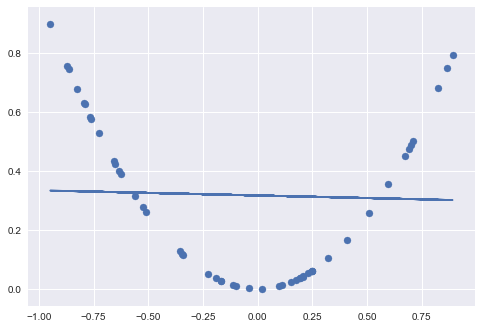

In [130]:
# Question 2 - Part a
rv_1 = [np.random.uniform(-1,1,100000)]
rv_2 = np.square(rv_1)
rv = np.concatenate((rv_1,rv_2),axis = 0)
rv_df = pd.DataFrame(rv).T

print "Correlation Matrix"
print rv_df.corr()
print

# Question 2 - Part b

slope = 0
intercept = 0
blah = 50
for i in range(blah):
    X = np.random.uniform(-1,1,50).reshape(50,1)
    y = np.square(X)
    
    #slope,intercept = np.polyfit(X,y,1)
    #vals = [slope * i + intercept for i in X]
    #plt.scatter(X,y)
    #plt.plot(X,vals,'--')
    #plt.show()
    
    lr = LinearRegression()
    lr_fit = lr.fit(X,y)
    slope += lr_fit.coef_[0][0]
    intercept += lr_fit.intercept_[0]

slope = float(slope)/float(blah)
intercept = float(intercept)/float(blah)


print "Slope: " + str(slope)
print "Intercept: " + str(intercept)
plt.scatter(X,y)
plt.plot(X ,slope* X +intercept, '-')
plt.show()

Problem 2 - Part a

I created a random variable and another dependent on the initial random variable. I calculated the correlation between the two variables. The correlation is very low between the two variables which demonstrate little to no correlation but very high dependency. 

Problem 2 - Part b

Variable y is dependent on X since y = X^2 and the variables are uncorrelated based on the correlation matrix. The slope variable from the linear regression identifies that the dependency is insignificant to the model due to the low value. 